In [1]:
# My Own Old Tensorflow Notes etc --- 
#https://datasciencewithrandpython.blogspot.com/search?q=tensor

## To be Explored - TensorFlow Probability (TFP) == https://www.tensorflow.org/probability

In [ ]:
## tf.Constants - fixed value tensors , they hold constant values Not trainable 
## tf.Variable 
## tf.Placeholders


In [1]:
import tensorflow as tf
import numpy as np 

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)
##  devices = tf.config.experimental.list_physical_devices(device_type="GPU")

Num GPUs Available:  1


In [2]:
print(type(tf))
print(tf.__version__)

<class 'module'>
2.2.0


In [3]:
## tf.Constants - fixed value tensors , they hold constant values Not trainable 

a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)
print(c)

tf.Tensor(3, shape=(), dtype=int32)


In [4]:
d = tf.multiply(a,b)
e = tf.add(c,b)
f = tf.subtract(d,e)

Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0


In [5]:
#sess = tf.Session() # Older TF Versions 
sess = tf.compat.v1.Session()
print(type(sess)) ## <class 'tensorflow.python.client.session.Session'>
"""
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

<class 'tensorflow.python.client.session.Session'>
"""


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

<class 'tensorflow.python.client.session.Session'>


In [6]:
## tf.Constants - fixed value tensors , they hold constant values Not trainable 
# Build a dataflow graph.
tf.debugging.set_log_device_placement(True)

ac = tf.constant([[1.0, 2.0], [3.0, 4.0]])
ad = tf.constant([[1.0, 1.0], [0.0, 1.0]])
ae = tf.matmul(ac, ad)

print(ae)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [7]:
# Construct a `Session` to execute the graph.
with tf.compat.v1.Session() as sess:

  # Build a dataflow graph.
  sc = tf.constant([[1.0, 2.0], [3.0, 4.0]])
  sd = tf.constant([[1.0, 1.0], [0.0, 1.0]])
  se = tf.matmul(sc, sd)

  # Execute the graph and store the value that `e` represents in `result`.
  result = sess.run(se)
  print(result)
sess.close()

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

[[1. 3.]
 [3. 7.]]


In [10]:
tf_var_str = tf.Variable("Hi Rohit - Assign a String to this tf_var_str",tf.string)
print(type(tf_var_str)) ## <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
tf_var_int = tf.Variable(1234,tf.int32)
print(type(tf_var_int)) ## same class as var_str ## <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


In [40]:
tf.rank(tf_var_str) ## RANK == 0 --and thus its a SCALAR == numpy=0

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [41]:
tf_var_str1 = tf.Variable(["Hi Rohit"],tf.string)
tf.rank(tf_var_str1) ## RANK == 1 -as its got 1 Dimension -1 ARRAY - 1 LIST -- and thus NOT a SCALAR == numpy=1

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [32]:
tf_var_str1_a = tf.Variable(["Hi Rohit","Still-Rank-1"],tf.string)
tf.rank(tf_var_str1_a) ## RANK == 1 -as its got 1 Dimension -1 ARRAY - 1 LIST with 2 STR ELEMENTS -- and thus NOT a SCALAR == numpy=1

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [48]:
tf_var_str2 = tf.Variable([["Hi Rohit"], ["Assign a String to this tf_var_str"]],tf.string)
tf.rank(tf_var_str2) ## RANK == 2 -as its got 2 Dimensions-2 ARRAYS - 2 LISTS -- and thus NOT a SCALAR == numpy=2

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [8]:
from tensorflow import keras
print(type(keras))
fashion_mnist_data = keras.datasets.fashion_mnist
print(type(fashion_mnist_data))
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist_data.load_data()

<class 'module'>
<class 'module'>


In [9]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

print(train_images.shape) # 60K images - each is 28X28 pixels
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [10]:
print(train_labels)
train_labels
## np.uint8 - uint8_t - Unsigned integer (0 to 255)
## https://numpy.org/devdocs/user/basics.types.html

[9 0 0 ... 3 0 5]


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
print(test_labels)
test_labels

[9 2 1 ... 8 1 5]


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

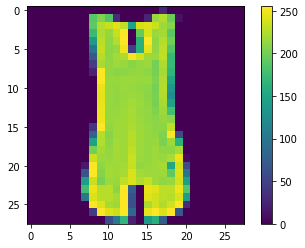

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[3])
plt.imshow(train_images[4])
plt.colorbar()
plt.gca().grid(False)

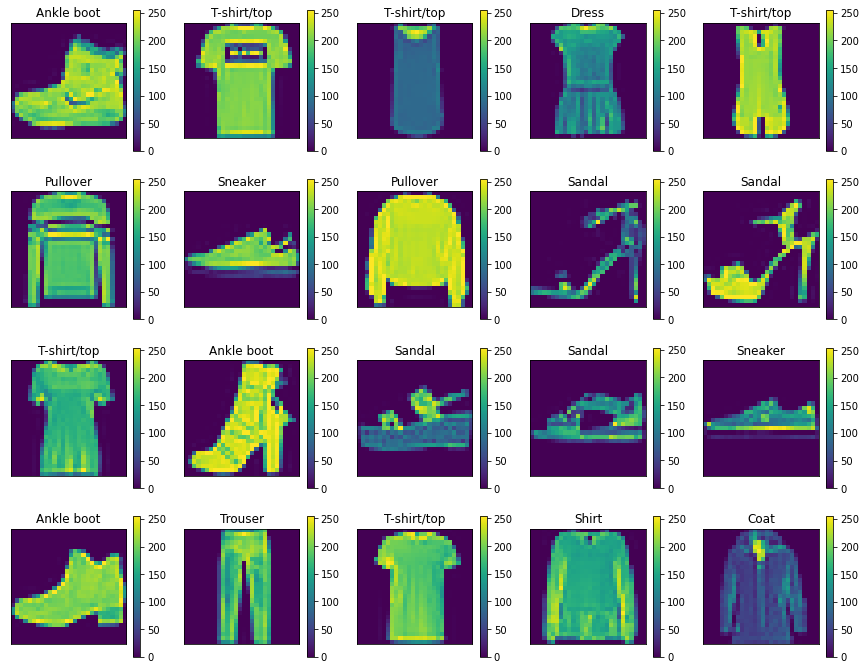

In [13]:
plt.figure(figsize=(15,15))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(train_images[i] )
    plt.title( labels[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.grid(False)
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # Line up all - Image Pixel intensity , Value Rows - into One Long vector
    #keras.layers.Dense(128, activation=tf.nn.relu), ## Can Add Another Hidden Layer 
    keras.layers.Dense(128, activation=tf.nn.relu), # Dense layer - 1st Layer of 128 Neurons - with 'relu' Activation Function
    keras.layers.Dense(10, activation=tf.nn.softmax) # Dense layer -2nd and last Layer of 10 Neurons - 'softmax' Activation Function
    ]) 

# Within ML there is an issue with - Memorization(OverFitting) and Generalization (Patterns recognized well but No OverFitting)
# Smaller Networks will have less chance of OverFitting - as they will have less opportunity to Memorize our Training Data 

# Softmax layer- is a Probability Distribution- over all Classes- that an image could be classified as,here images can be classified into 10 Pre-defnined Labels. 
# Mostly all internal layers can have RELU as the Activation Function. 

print(model) ##<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4199793400>
print(type(model)) ## <class 'tensorflow.python.keras.engine.sequential.Sequential'>

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [15]:
# BackPropogation and Gradient Decent - is managed by the Optimizers 
model.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy', #
              metrics= ['accuracy'])


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [16]:
model.fit(train_images,train_labels,epochs=5)
## Loss - Lower is better
## Epoch - How many times are we Training - for what Duration are we Training on the Training Set 
## Accuracy - Higher the better . 
## If Accuracy for Train and Testing Sets is very much DIFF then we dont have a Good Model.
## If both Accuracy Values are LOW -- Train model for more EPOCHS on the Train Set. 

## Train_Accuracy > Test_Accuracy [MODEL OVER-FIT]
## Test_Accuracy  > Train_Accuracy [MODEL UNDER-FIT]

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/5
E

In [17]:
predictions = model.predict(test_images)
print(type(predictions))
print(predictions[1])
predictions[1]


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_predict_function_19397 in device /job:localhost/replica:0/task:0/de

array([1.49267771e-05, 2.50110730e-07, 9.93119717e-01, 2.44013404e-06,
       6.04654476e-03, 1.05577224e-22, 8.16134911e-04, 0.00000000e+00,
       9.02807828e-10, 3.60099141e-36], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
model.evaluate(test_images,test_labels)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_19858 in device /job:localhost/replica:0/task:0/devic

[0.5354427695274353, 0.8197000026702881]

In [20]:
classification= model.predict(test_images)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0


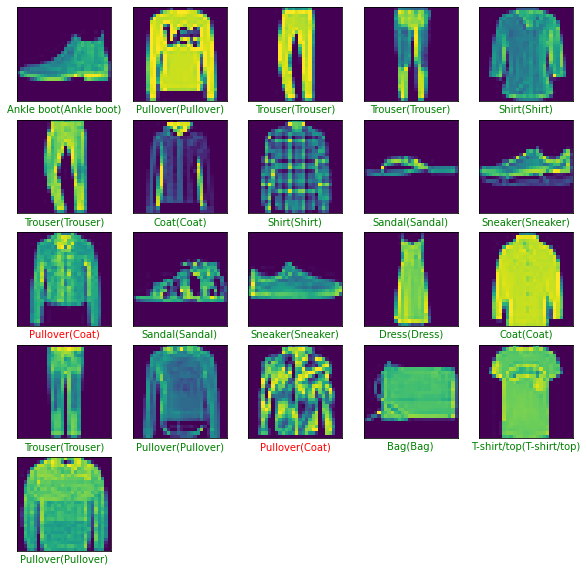

In [21]:
def showClassification():
    class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    plt.figure(figsize=(10,10))
    for p in range(len(test_labels)):
        plt.subplot(5,5,p+1)
        plt.grid("off")
        plt.yticks([])
        plt.xticks([])
        plt.imshow(test_images[p])
        predicted_label = np.argmax(predictions[p])
        true_label = test_labels[p]
        if predicted_label == true_label:
            color = 'green'
        else:
            color = 'red'
        plt.xlabel("{}({})".format(class_names[predicted_label],
                                 class_names[true_label]),
                                 color=color)
        if p == 20:
            break
        
showClassification()


In [61]:
print(type(tf))

print(type(keras.Sequential))

from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPooling2D,BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import TensorBoard,EarlyStopping
import pandas as pd
from IPython.display import display
from sklearn.metrics import classification_report
from keras.utils import np_utils
import numpy as np
from keras.optimizers import Adam

<class 'module'>
<class 'type'>


ModuleNotFoundError: No module named 'keras'

In [20]:
with tf.compat.v1.Session() as sess:
    fetches = [a,b,c,d,e,f]
    outs = sess.run(fetches)

AttributeError: Tensor.graph is meaningless when eager execution is enabled.